In [83]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [84]:
# Load the dataset
data = pd.read_csv('Advertising.csv')

In [85]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [86]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [87]:
# Check for null values
print("\nMissing values in dataset:")
print(data.isnull().sum())


Missing values in dataset:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [88]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [89]:
data.shape

(200, 5)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [91]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


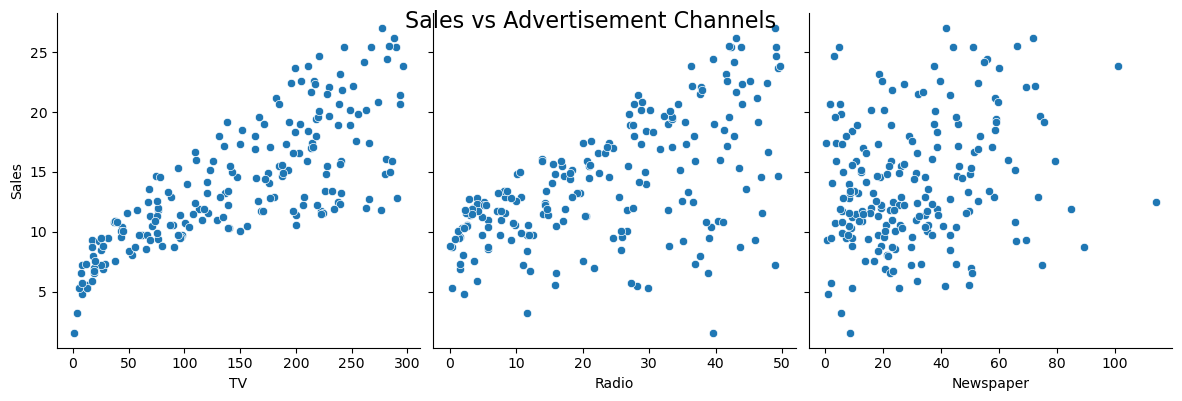

In [92]:
# Data visualization
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle("Sales vs Advertisement Channels", fontsize=16)
plt.show()

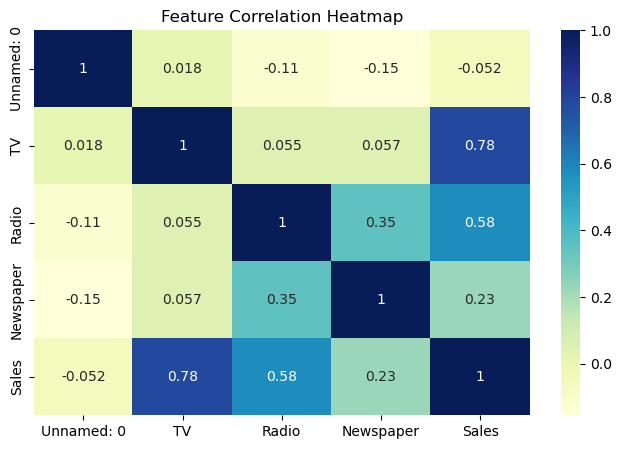

In [93]:
# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()

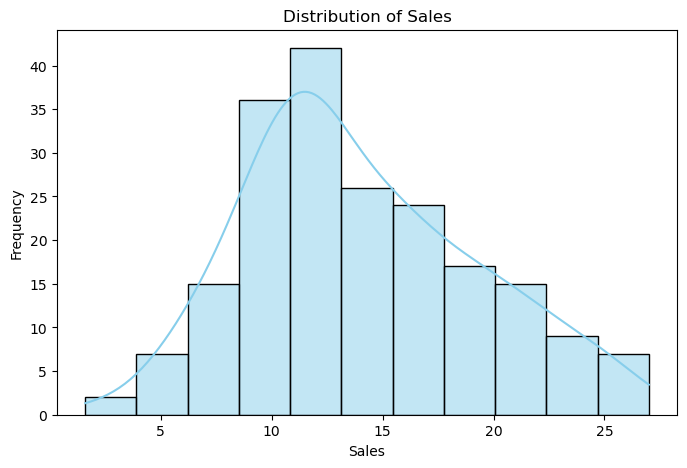

In [94]:
#histogram in Distribution of Sales
plt.figure(figsize=(8,5))
sns.histplot(data['Sales'], kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

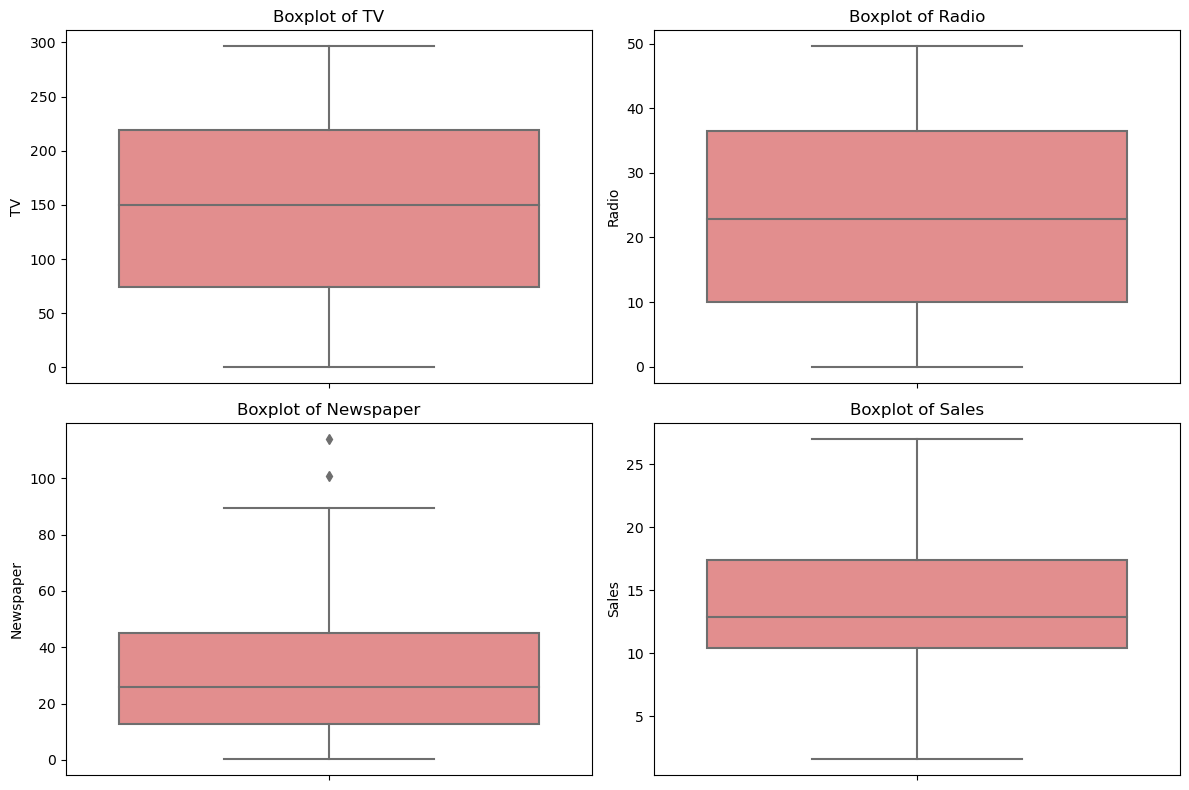

In [95]:
#Boxplots to Detect Outliers
features = ['TV', 'Radio', 'Newspaper', 'Sales']
plt.figure(figsize=(12,8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=data[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [96]:
#Sales vs Each Advertisement Channel (Line Plot/Trend)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'TV vs Sales')

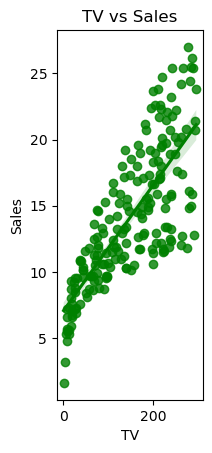

In [97]:
plt.subplot(1, 3, 1)
sns.regplot(x='TV', y='Sales', data=data, color='green')
plt.title('TV vs Sales')

Text(0.5, 1.0, 'Radio vs Sales')

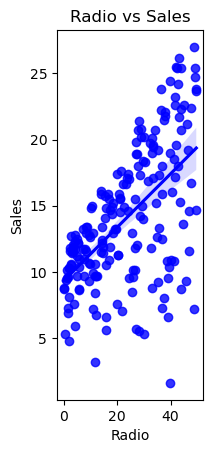

In [98]:
plt.subplot(1, 3, 2)
sns.regplot(x='Radio', y='Sales', data=data, color='blue')
plt.title('Radio vs Sales')

Text(0.5, 1.0, 'Newspaper vs Sales')

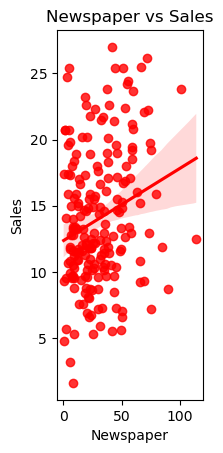

In [99]:
plt.subplot(1, 3, 3)
sns.regplot(x='Newspaper', y='Sales', data=data, color='red')
plt.title('Newspaper vs Sales')

In [100]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

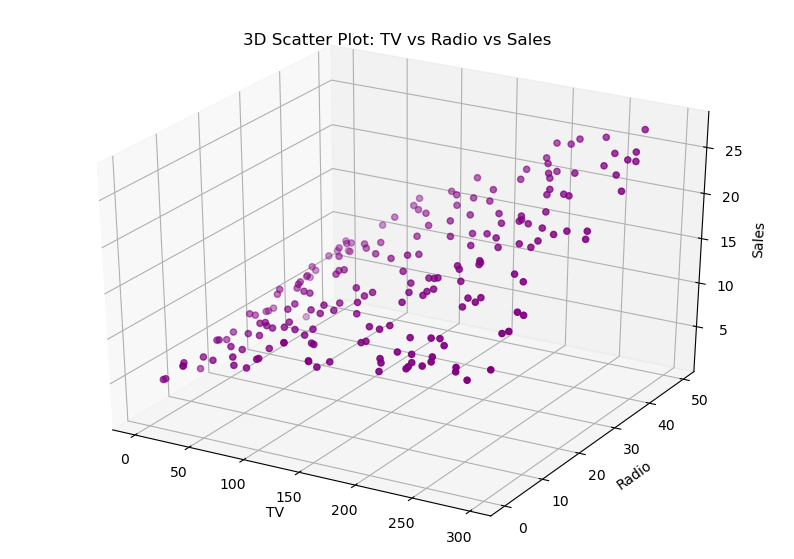

In [101]:
#3D Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['TV'], data['Radio'], data['Sales'], c='purple', marker='o')

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title('3D Scatter Plot: TV vs Radio vs Sales')
plt.show()

In [102]:
# Split the data
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [105]:
# Make predictions
y_pred = model.predict(X_test)

In [106]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [107]:
print("\nModel Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Model Performance:
R² Score: 0.8994
Mean Squared Error (MSE): 3.1741
Root Mean Squared Error (RMSE): 1.7816


In [108]:
# Coefficients
print("\nModel Coefficients:")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Model Coefficients:
           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


In [109]:
# Predicting sales for a custom input
custom_input = pd.DataFrame({'TV': [120], 'Radio': [30], 'Newspaper': [20]})
custom_prediction = model.predict(custom_input)
print(f"\nPredicted Sales for custom input: {custom_prediction[0]:.2f}")


Predicted Sales for custom input: 14.08


## Project Steps – What I Did

- Imported the dataset (`Advertising.csv`) containing advertising budgets and corresponding sales data.
- Checked for missing values and verified the structure of the dataset.
- Performed exploratory data analysis (EDA):
  - Visualized relationships between features using pairplots and correlation heatmaps.
  - Created boxplots to identify outliers in TV, Radio, Newspaper, and Sales columns.
  - Analyzed the strength of correlation between each feature and the target variable (Sales).
- Split the dataset into training and testing sets (80% train, 20% test).
- Built a Linear Regression model using Scikit-learn.
- Trained the model on the training data.
- Predicted sales values on the test data.
- Evaluated the model performance using R² Score, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
- Displayed the model's coefficients to interpret the influence of each advertising channel.
- Performed custom sales predictions using sample input values.
- Concluded that TV and Radio advertising significantly impact sales, while Newspaper has a minimal effect.
